## Tutorial

Welcome to `ktplotspy`! This is a python library to help visualise `CellphoneDB` results, ported from the original [ktplots R package](https://www.github.com/zktuong/ktplots) (which still has several other visualisation options). Here, we will go through a quick tutorial on how to use the functions in this package.

**Import libraries**

In [1]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy

**Prepare input**

We will need 3 files to use this package, the h5ad file used for `CelllphoneDB` and the `means.txt` and `pvalues.txt` output.

In [2]:
os.chdir('/Users/kt16/Documents/Github/ktplotspy')

# read in the files
# 1) .h5ad file used for performing cellphonedb
adata = ad.read_h5ad('data/kidneyimmune.h5ad')

# 2) output from cellphonedb
means = pd.read_csv('data/out/means.txt', sep = '\t')
pvals = pd.read_csv('data/out/pvalues.txt', sep = '\t')

### Heatmap

The original heatmap plot from `CellphoneDB` can be achieved with this reimplemented function.

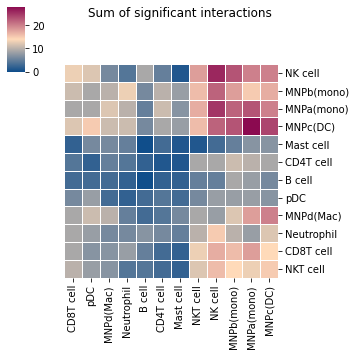

In [3]:
kpy.plot_cpdb_heatmap(
        adata=adata,
        pvals=pvals,
        celltype_key="celltype",
        figsize = (5,5),
        title = "Sum of significant interactions"
    )

### Dot plot

A simple usage of `plot_cpdb` is like as follows:

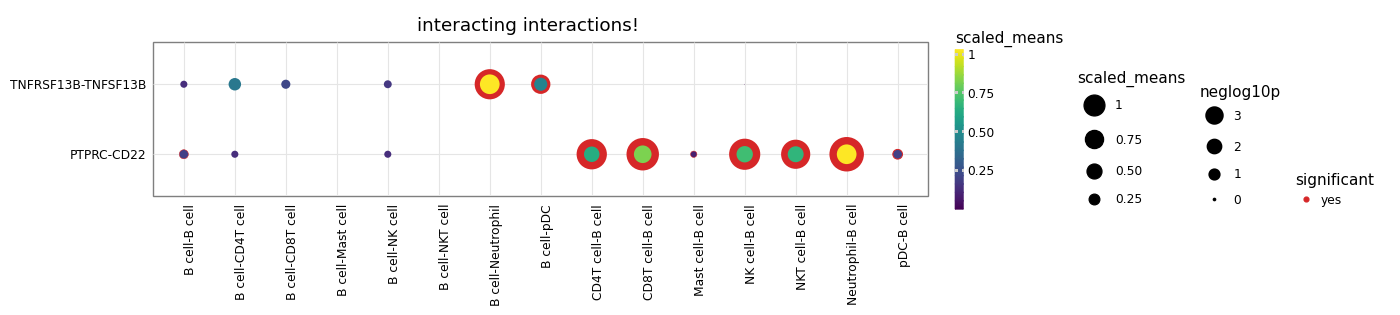

<ggplot: (315431810)>

In [4]:
# TODO: How to specify the default plot resolution??
kpy.plot_cpdb(
        adata=adata,
        cell_type1="B cell",
        cell_type2=".", # this means all cell-types
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        genes=["PTPRC", "TNFSF13"],
        figsize = (10,2),
        title = "interacting interactions!"
    )

You can also specify a `gene_family`.

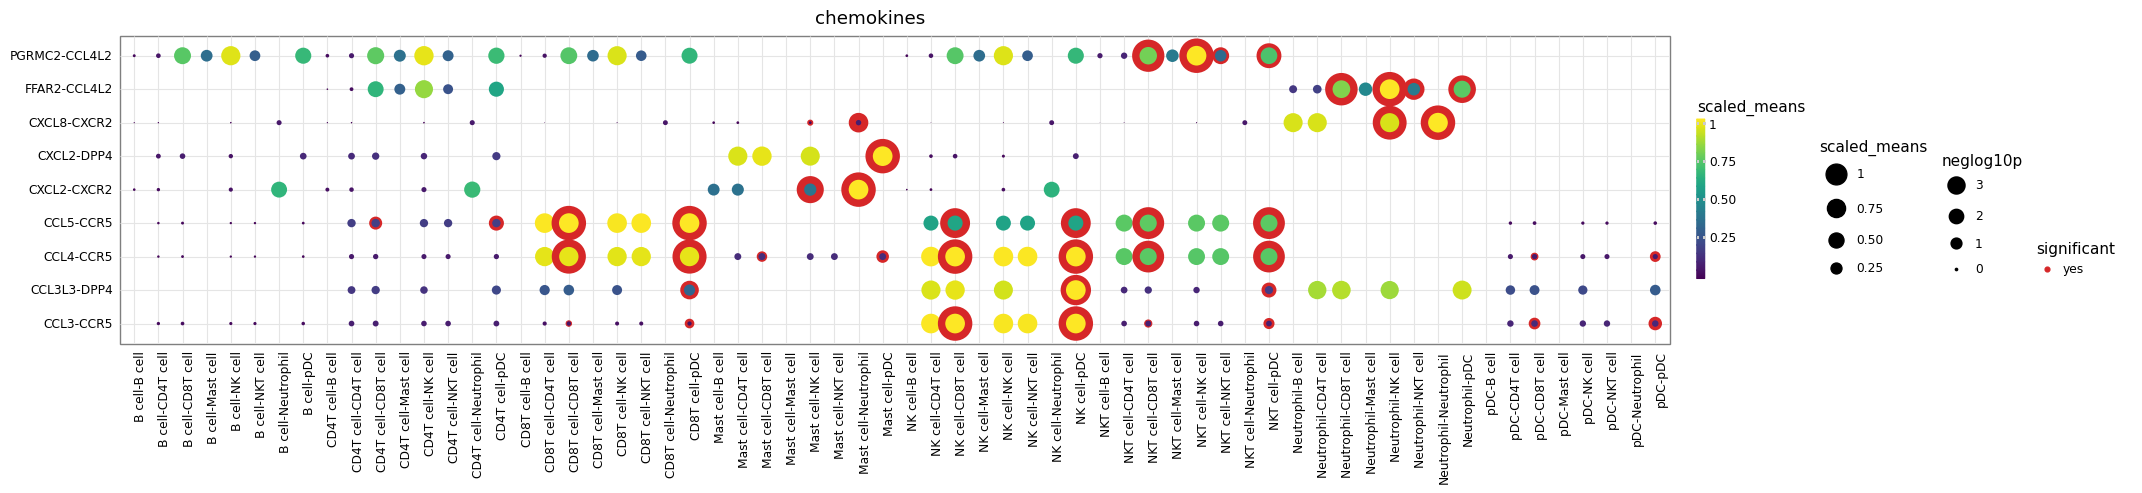

<ggplot: (315416914)>

In [5]:
kpy.plot_cpdb(
        adata=adata,
        cell_type1=".",
        cell_type2=".",
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        gene_family = "chemokines",
        figsize = (20,4)
    )

Or don't specify either and it will try to plot all significant interactions.

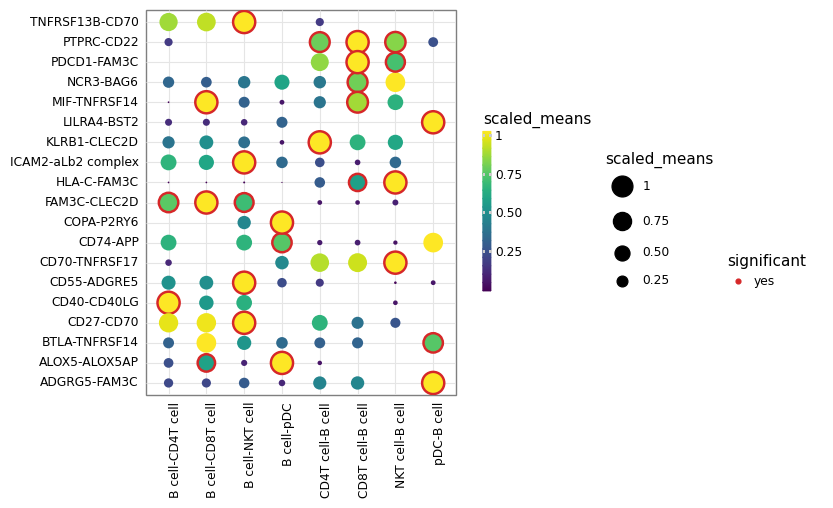

<ggplot: (315655674)>

In [6]:
kpy.plot_cpdb(
        adata=adata,
        cell_type1="B cell",
        cell_type2="pDC|T",
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        highlight_size = 1,
        figsize = (4, 5)
    )

If you prefer, you can also use the `squidpy` inspired plotting style:

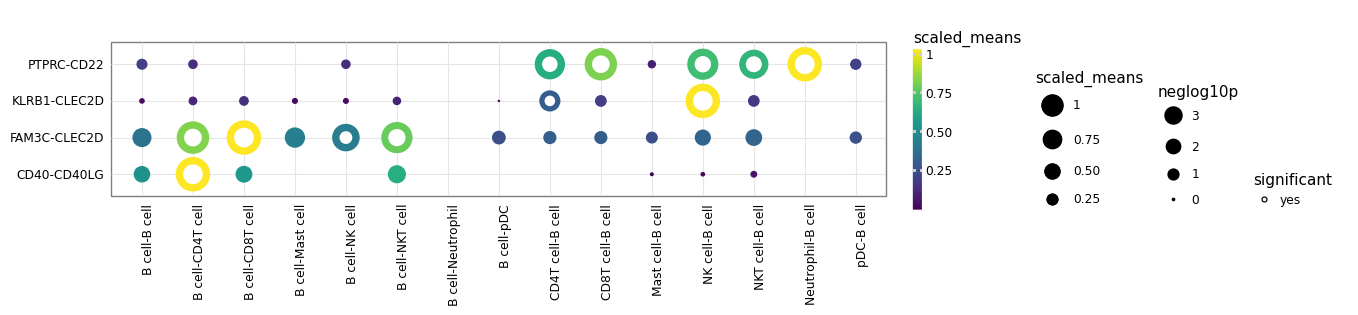

<ggplot: (315718518)>

In [7]:
kpy.plot_cpdb(
        adata=adata,
        cell_type1="B cell",
        cell_type2=".",
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        genes=["PTPRC", "CD40", "CLEC2D"],
        default_style = False,
        figsize = (10,2)
    )

You can specify more than 1 families.

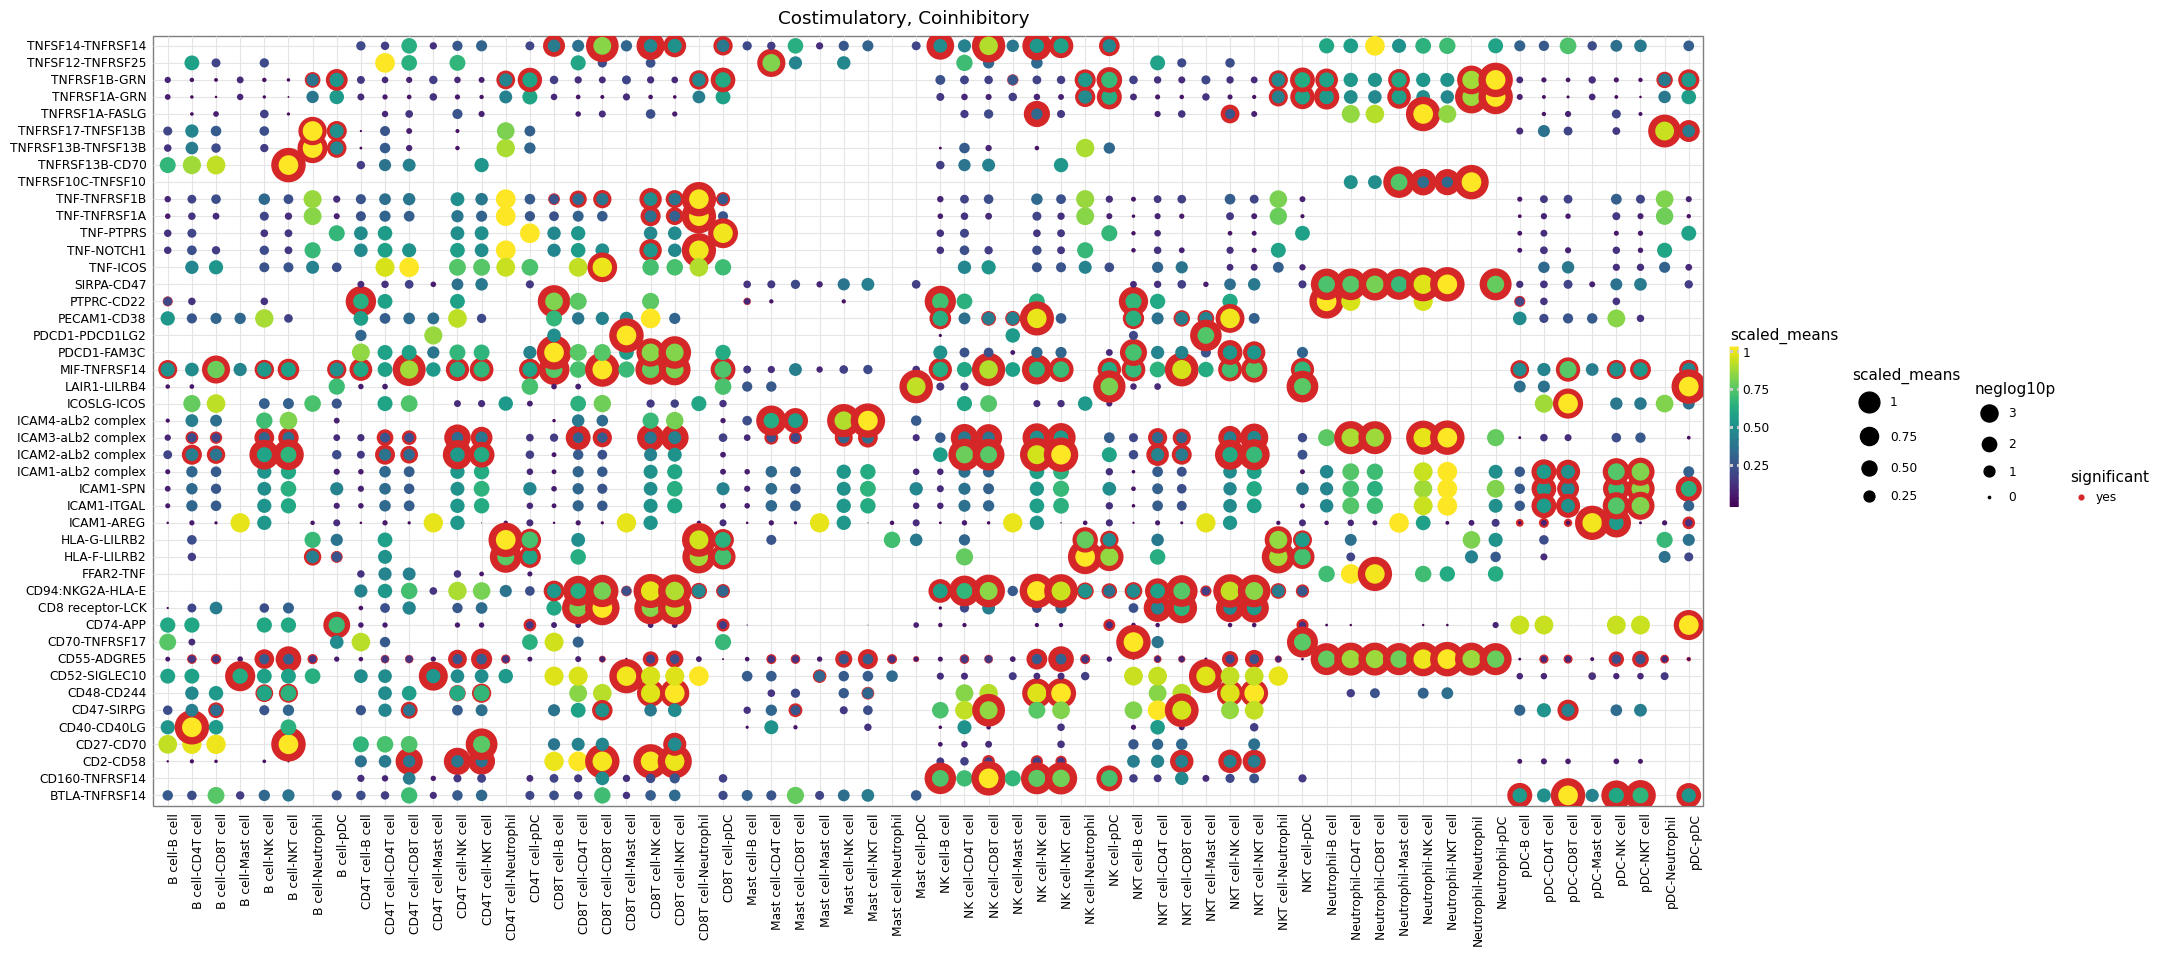

<ggplot: (315809789)>

In [8]:
kpy.plot_cpdb(
        adata=adata,
        cell_type1=".",
        cell_type2=".",
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        gene_family=["Costimulatory", "Coinhibitory"],
        figsize = (20,10)
    )

you can also provide a custom family

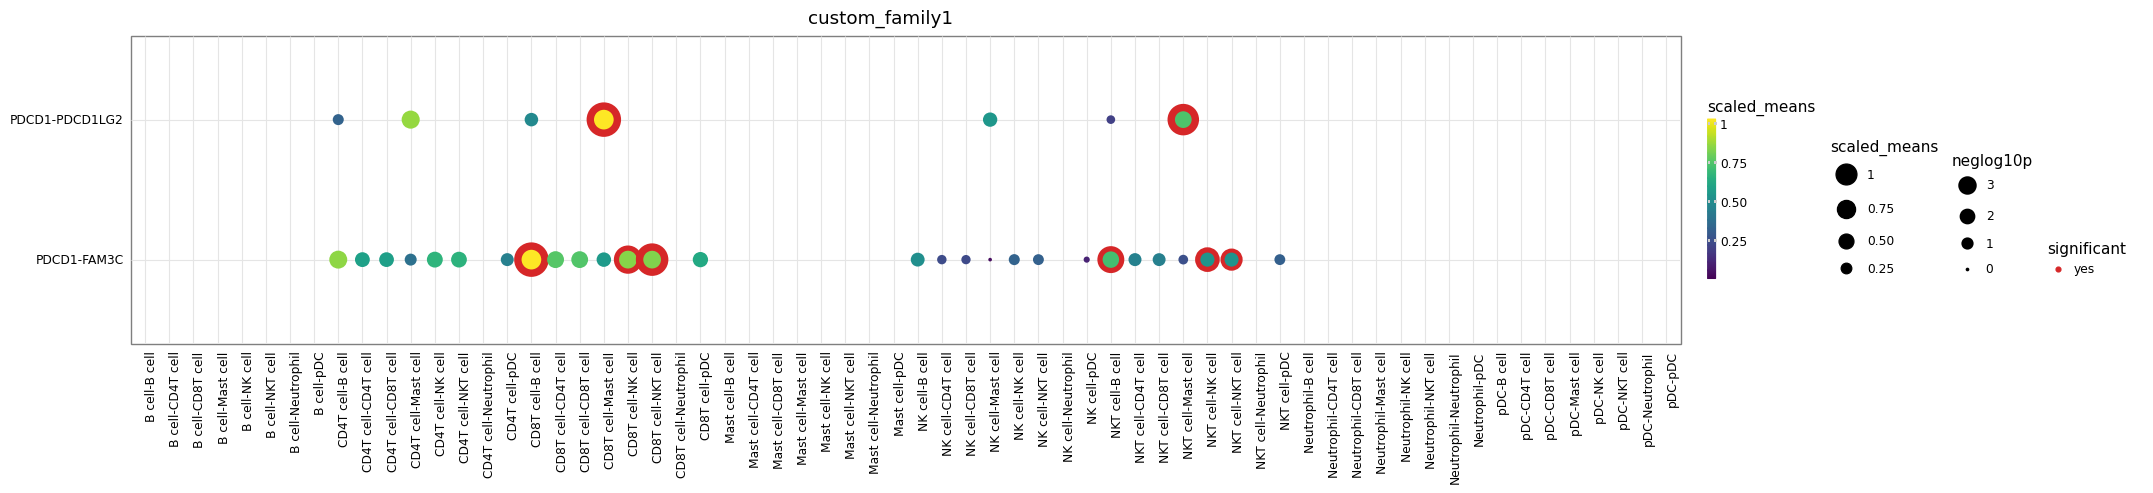

<ggplot: (315977497)>

In [9]:
newfams = {"custom_family1":["CD274", "CXCR5", "PDCD1"], "custom_family2":["TNFRSF1A", "CD70"]}
kpy.plot_cpdb(
        adata=adata,
        cell_type1=".",
        cell_type2=".",
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        gene_family="custom_family1",
        custom_gene_family=newfams, 
        figsize = (20,4)
    )

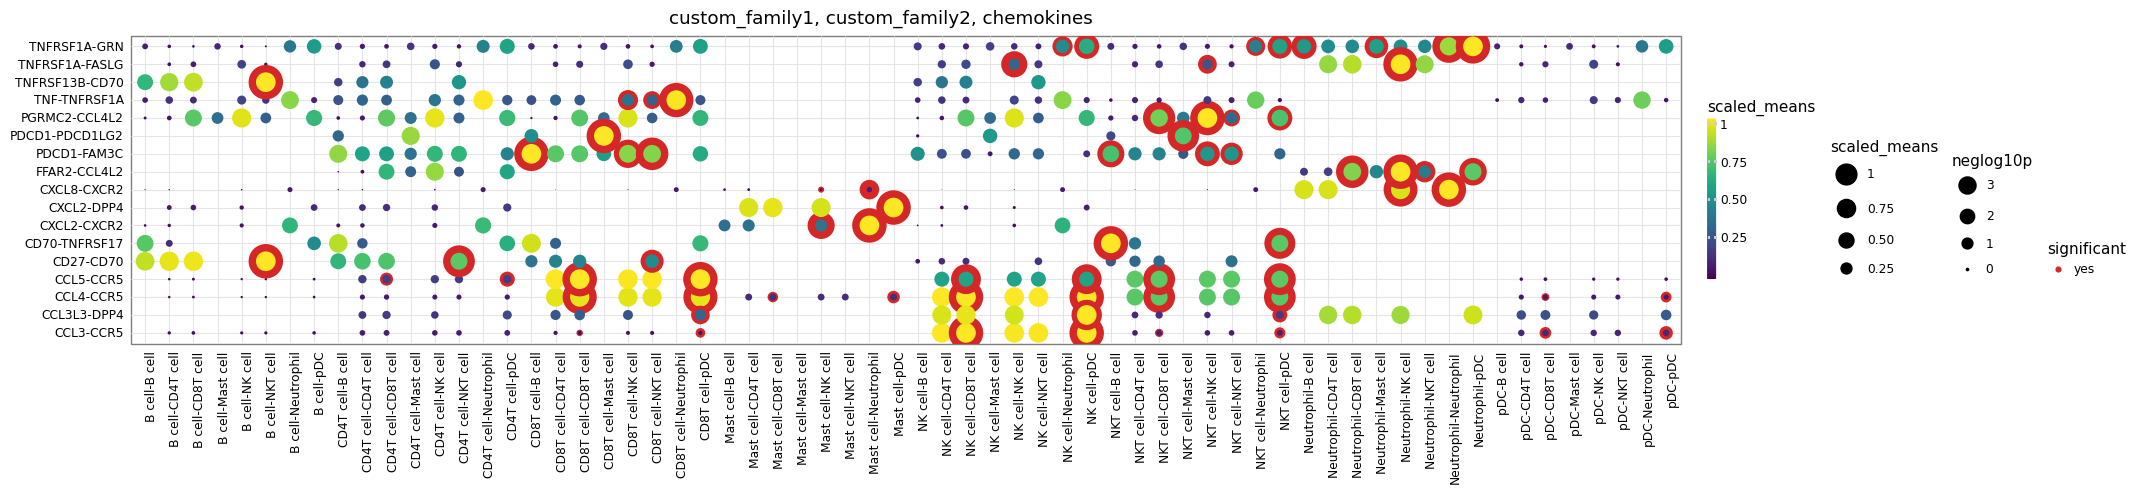

<ggplot: (316094745)>

In [10]:
kpy.plot_cpdb(
        adata=adata,
        cell_type1=".",
        cell_type2=".",
        means=means,
        pvals=pvals,
        celltype_key="celltype",
        gene_family=["custom_family1", "custom_family2", "chemokines"],
        custom_gene_family=newfams, 
        figsize = (20,4)
    )

That's it for now! Please check out the original [ktplots R package](https://www.github.com/zktuong/ktplots) if you are after other kinds of visualisations.